In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import anderson
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
%matplotlib inline

board_games = pd.read_csv("board_games.csv")

board_games.head(5)

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [3]:
board_games.dropna(inplace=True)

In [4]:
board_games = board_games[board_games["average_rating"] != 0]

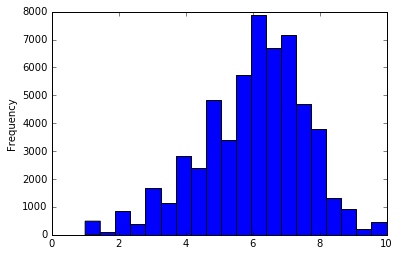

In [5]:
board_games["average_rating"].plot.hist(bins=20)
plt.xlim([0,10])
plt.show()

The average ratings of the board games seem to exhibit a normal distribution around a rating of 6-7. The distribution has no praticular skew and has basically a normal distribution, perhaps a moderately left skew. The distribution have no particular outliers 

In [6]:
s, c, si = anderson(board_games["average_rating"])
print(s, c, si)

322.635262236 [ 0.576  0.656  0.787  0.918  1.092] [ 15.   10.    5.    2.5   1. ]


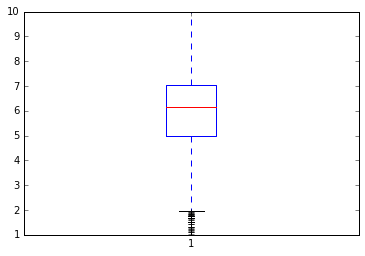

In [7]:
plt.boxplot(board_games["average_rating"])
plt.show()

In [8]:
x_bar = np.mean(board_games["average_rating"])
std = np.std(board_games["average_rating"])

print(x_bar, std)

6.01611284933 1.57881605958


Because the average_rating is continuous between 0 and 10 then RMSE will work as a measure of error

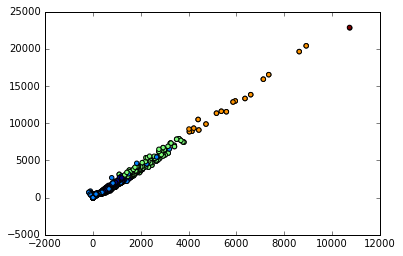

In [9]:
km = KMeans(n_clusters = 5)

numeric_columns = board_games.columns.values.tolist()
numeric_columns.remove("name")
numeric_columns.remove("type")
numeric_columns.remove("id")

km.fit(board_games[numeric_columns])

labels = km.labels_

game_mean = board_games[numeric_columns].apply(np.mean,axis=1)
game_std = board_games[numeric_columns].apply(np.std,axis=1)

plt.scatter(game_mean,game_std,c=labels)
plt.show()

In [10]:
correlations = board_games[numeric_columns].corr()

In [11]:
correlations["average_rating"]

yearpublished           0.108461
minplayers             -0.032701
maxplayers             -0.008335
playingtime             0.048994
minplaytime             0.043985
maxplaytime             0.048994
minage                  0.210049
users_rated             0.112564
average_rating          1.000000
bayes_average_rating    0.231563
total_owners            0.137478
total_traders           0.119452
total_wanters           0.196566
total_wishers           0.171375
total_comments          0.123714
total_weights           0.109691
average_weight          0.351081
Name: average_rating, dtype: float64

People tend to rate games more highly that have higher subjective weights. After reading the description for 'weights' I can see that people tend to rate games that are more complex and require more skill highly.

In [12]:
interesting_columns = numeric_columns
interesting_columns.remove("bayes_average_rating")
interesting_columns.remove("average_rating")
interesting_columns.remove("minplayers")
interesting_columns.remove("maxplayers")
interesting_columns.remove("playingtime")
interesting_columns.remove("minplaytime")
interesting_columns.remove("maxplaytime")

In [13]:
reg = LinearRegression()
reg.fit(board_games[interesting_columns],board_games["average_rating"])
predictions = reg.predict(board_games[interesting_columns])
mse = mse(predictions,board_games["average_rating"])
rmse = mse ** 0.5

print(rmse)

1.44812158799


In [23]:
mx = max(board_games["minplayers"])
mx

40.0